In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 3


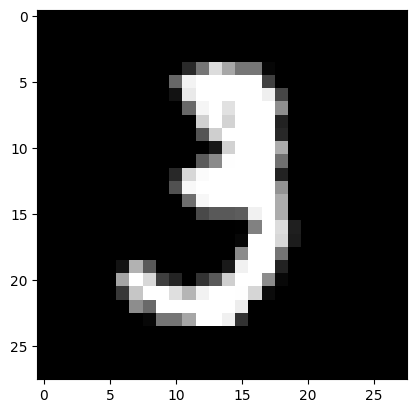

In [5]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [6]:
import torchvision.transforms as transforms

In [7]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

image_tensor, label = dataset[0]
print(image_tensor.shape, label)
image_tensor[:,10:15, 10:15]

torch.Size([1, 28, 28]) 5


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])

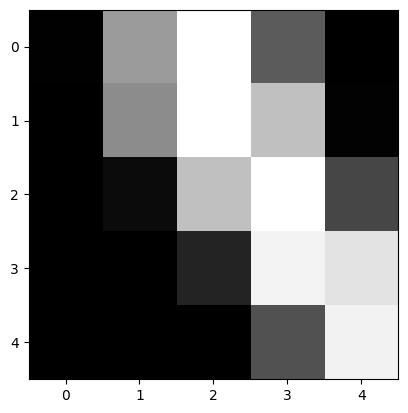

In [8]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

In [9]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [10]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [11]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [12]:
print(model.weight.shape)
print(model.weight)

print(model.bias.shape)
model.bias

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0056, -0.0172,  0.0244,  ..., -0.0316,  0.0116, -0.0166],
        [ 0.0265,  0.0167,  0.0070,  ...,  0.0116,  0.0116, -0.0074],
        [-0.0031,  0.0191,  0.0210,  ...,  0.0134, -0.0243, -0.0026],
        ...,
        [ 0.0069, -0.0294,  0.0235,  ..., -0.0249, -0.0202,  0.0051],
        [ 0.0259,  0.0243, -0.0313,  ...,  0.0099,  0.0340, -0.0207],
        [ 0.0033,  0.0339, -0.0169,  ...,  0.0316, -0.0264, -0.0223]],
       requires_grad=True)
torch.Size([10])


Parameter containing:
tensor([-0.0224,  0.0066,  0.0170,  0.0183,  0.0302, -0.0129,  0.0165, -0.0258,
        -0.0265,  0.0291], requires_grad=True)

In [13]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break;

tensor([4, 3, 7, 5, 2, 2, 9, 0, 6, 0, 8, 1, 5, 6, 8, 6, 0, 9, 6, 3, 0, 3, 1, 4,
        5, 1, 0, 7, 0, 7, 6, 1, 3, 1, 1, 4, 1, 0, 4, 3, 6, 5, 4, 2, 9, 9, 3, 2,
        5, 1, 3, 2, 3, 6, 2, 1, 7, 6, 3, 6, 9, 2, 2, 3, 9, 1, 5, 7, 9, 3, 4, 8,
        9, 2, 9, 3, 0, 2, 3, 3, 5, 6, 5, 6, 2, 3, 3, 3, 7, 1, 6, 3, 7, 8, 9, 0,
        7, 2, 0, 8, 9, 3, 0, 8, 0, 0, 0, 1, 2, 6, 0, 9, 8, 4, 9, 2, 0, 1, 9, 6,
        6, 7, 1, 2, 8, 6, 4, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [14]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [15]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0337, -0.0184, -0.0177,  ...,  0.0016,  0.0264,  0.0169],
         [ 0.0247,  0.0232, -0.0152,  ..., -0.0174,  0.0347,  0.0127],
         [-0.0210,  0.0311, -0.0328,  ..., -0.0263,  0.0136,  0.0211],
         ...,
         [ 0.0167, -0.0006,  0.0004,  ...,  0.0139,  0.0303,  0.0041],
         [-0.0078,  0.0126,  0.0331,  ...,  0.0157,  0.0300,  0.0350],
         [-0.0106,  0.0255,  0.0009,  ...,  0.0041, -0.0069, -0.0136]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0072,  0.0038,  0.0207, -0.0275, -0.0320, -0.0265, -0.0038,  0.0128,
         -0.0184, -0.0030], requires_grad=True)]

In [16]:
for images, labels in train_loader:
    print('images.shape: ', images.shape)
    outputs = model(images)
    break;

print('outputs.shape: ', outputs.shape)
print('Sample outputs: ', outputs[:2].data)

images.shape:  torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
Sample outputs:  tensor([[-0.1034, -0.0626, -0.0896,  0.2679, -0.1297, -0.0661, -0.0426,  0.3576,
          0.3722,  0.0303],
        [ 0.3041,  0.0863,  0.0527,  0.1245,  0.2276,  0.0697, -0.0342, -0.1630,
          0.3703,  0.0739]])


In [17]:
#softmax
print(outputs[0])
exps = torch.exp(outputs[0])
print(exps)
probs = exps / torch.sum(exps)
print(probs)
print(torch.sum(probs))

tensor([-0.1034, -0.0626, -0.0896,  0.2679, -0.1297, -0.0661, -0.0426,  0.3576,
         0.3722,  0.0303], grad_fn=<SelectBackward0>)
tensor([0.9018, 0.9393, 0.9143, 1.3073, 0.8783, 0.9361, 0.9583, 1.4299, 1.4509,
        1.0307], grad_fn=<ExpBackward0>)
tensor([0.0839, 0.0874, 0.0851, 0.1216, 0.0817, 0.0871, 0.0892, 0.1331, 0.1350,
        0.0959], grad_fn=<DivBackward0>)
tensor(1., grad_fn=<SumBackward0>)


In [18]:
import torch.nn.functional as F
probs = F.softmax(outputs, dim=1)
torch.sum(probs[0].data).item()

0.9999999403953552

In [19]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 8, 3, 8, 9, 9, 8, 9, 3, 3, 3, 9, 3, 8, 9, 3, 8, 3, 5, 3, 9, 7, 3, 3,
        5, 9, 4, 1, 8, 3, 8, 3, 3, 2, 8, 8, 8, 3, 9, 3, 3, 9, 3, 8, 2, 3, 3, 3,
        3, 8, 9, 8, 2, 3, 3, 8, 3, 3, 2, 9, 3, 8, 8, 8, 3, 8, 3, 8, 9, 8, 3, 0,
        8, 5, 8, 8, 9, 8, 8, 2, 8, 3, 8, 9, 3, 8, 3, 2, 3, 3, 8, 3, 3, 8, 3, 3,
        2, 8, 8, 0, 8, 8, 2, 8, 9, 2, 9, 1, 0, 5, 2, 1, 3, 1, 3, 3, 3, 8, 3, 5,
        8, 8, 2, 2, 8, 9, 3, 9])
tensor([0.1350, 0.1281, 0.1297, 0.1223, 0.1412, 0.1512, 0.1121, 0.1220, 0.1275,
        0.1247, 0.1226, 0.1327, 0.1259, 0.1333, 0.1506, 0.1193, 0.1338, 0.1232,
        0.1133, 0.1187, 0.1361, 0.1302, 0.1185, 0.1422, 0.1217, 0.1536, 0.1246,
        0.1192, 0.1227, 0.1159, 0.1409, 0.1421, 0.1149, 0.1345, 0.1555, 0.1454,
        0.1490, 0.1284, 0.1232, 0.1211, 0.1383, 0.1773, 0.1281, 0.1412, 0.1216,
        0.1329, 0.1187, 0.1141, 0.1211, 0.1264, 0.1410, 0.1222, 0.1226, 0.1340,
        0.1257, 0.1377, 0.1346, 0.1329, 0.1126, 0.1333, 0.1391, 0.1272, 0.1274,
       

In [20]:
labels

tensor([8, 4, 9, 9, 2, 0, 9, 6, 2, 4, 1, 1, 1, 4, 6, 2, 5, 1, 1, 1, 5, 1, 3, 8,
        8, 0, 4, 4, 5, 1, 5, 7, 1, 2, 0, 8, 7, 5, 3, 1, 5, 2, 8, 9, 6, 0, 3, 6,
        6, 2, 0, 8, 7, 1, 1, 6, 1, 1, 2, 6, 8, 9, 4, 7, 3, 5, 1, 7, 6, 8, 3, 5,
        4, 8, 7, 4, 2, 8, 0, 4, 6, 5, 8, 7, 9, 2, 5, 0, 1, 7, 8, 1, 1, 7, 1, 3,
        7, 0, 7, 4, 0, 9, 2, 5, 0, 5, 2, 7, 4, 8, 5, 8, 6, 9, 1, 1, 2, 4, 0, 8,
        9, 8, 0, 8, 7, 0, 7, 0])

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [22]:
accuracy(outputs, labels)

tensor(0.1328)

In [23]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3344, grad_fn=<NllLossBackward0>)


In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [25]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [26]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [27]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.32320499420166, 'val_acc': 0.05300632864236832}

In [28]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9528, val_acc: 0.6343
Epoch [1], val_loss: 1.6849, val_acc: 0.7309
Epoch [2], val_loss: 1.4845, val_acc: 0.7640
Epoch [3], val_loss: 1.3330, val_acc: 0.7845
Epoch [4], val_loss: 1.2162, val_acc: 0.7986


In [41]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1245, val_acc: 0.8098
Epoch [1], val_loss: 1.0509, val_acc: 0.8162
Epoch [2], val_loss: 0.9907, val_acc: 0.8224
Epoch [3], val_loss: 0.9406, val_acc: 0.8274
Epoch [4], val_loss: 0.8983, val_acc: 0.8315


In [47]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8620, val_acc: 0.8336
Epoch [1], val_loss: 0.8306, val_acc: 0.8365
Epoch [2], val_loss: 0.8031, val_acc: 0.8389
Epoch [3], val_loss: 0.7788, val_acc: 0.8416
Epoch [4], val_loss: 0.7571, val_acc: 0.8436


In [50]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7377, val_acc: 0.8455
Epoch [1], val_loss: 0.7202, val_acc: 0.8474
Epoch [2], val_loss: 0.7043, val_acc: 0.8486
Epoch [3], val_loss: 0.6898, val_acc: 0.8499
Epoch [4], val_loss: 0.6765, val_acc: 0.8516


In [42]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())


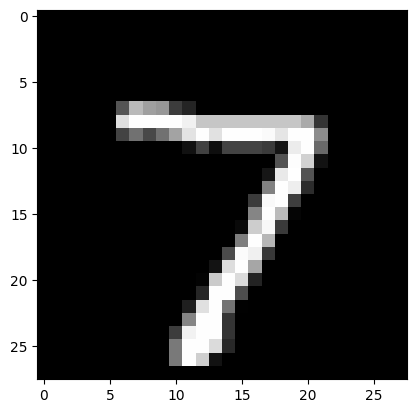

In [43]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')

In [31]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [34]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 9 , Predicted: 7


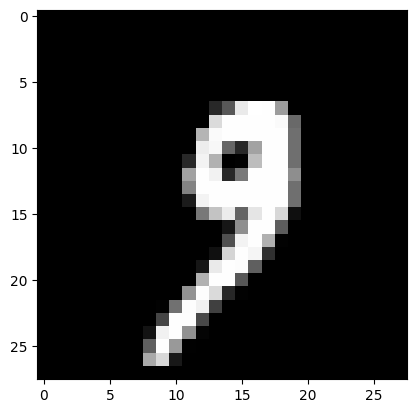

In [51]:
img, label =test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [40]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 1.1864194869995117, 'val_acc': 0.808789074420929}

In [46]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8639562726020813, 'val_acc': 0.8345702886581421}

In [49]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.7222319841384888, 'val_acc': 0.8504883050918579}

In [52]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6417790055274963, 'val_acc': 0.859179675579071}

In [53]:
torch.save(model.state_dict(), 'mnist-logistic.pth')


In [54]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0103,  0.0140,  0.0286,  ..., -0.0282,  0.0110, -0.0158],
                      [ 0.0003,  0.0245, -0.0112,  ...,  0.0284, -0.0249, -0.0087],
                      [-0.0248,  0.0046, -0.0227,  ...,  0.0130,  0.0286, -0.0287],
                      ...,
                      [ 0.0299, -0.0019, -0.0144,  ..., -0.0097,  0.0098, -0.0144],
                      [-0.0113,  0.0069, -0.0168,  ..., -0.0353, -0.0152,  0.0200],
                      [ 0.0179,  0.0051,  0.0296,  ...,  0.0262, -0.0089, -0.0175]])),
             ('linear.bias',
              tensor([-0.0550,  0.1224,  0.0041, -0.0154,  0.0279,  0.0474,  0.0195,  0.0111,
                      -0.0815, -0.0319]))])

In [55]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0103,  0.0140,  0.0286,  ..., -0.0282,  0.0110, -0.0158],
                      [ 0.0003,  0.0245, -0.0112,  ...,  0.0284, -0.0249, -0.0087],
                      [-0.0248,  0.0046, -0.0227,  ...,  0.0130,  0.0286, -0.0287],
                      ...,
                      [ 0.0299, -0.0019, -0.0144,  ..., -0.0097,  0.0098, -0.0144],
                      [-0.0113,  0.0069, -0.0168,  ..., -0.0353, -0.0152,  0.0200],
                      [ 0.0179,  0.0051,  0.0296,  ...,  0.0262, -0.0089, -0.0175]])),
             ('linear.bias',
              tensor([-0.0550,  0.1224,  0.0041, -0.0154,  0.0279,  0.0474,  0.0195,  0.0111,
                      -0.0815, -0.0319]))])

In [56]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6417790055274963, 'val_acc': 0.859179675579071}